In [118]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
import cv2
from skimage import io,measure
from scipy import ndimage as nd
from PIL import Image

In [496]:
input_image = imread("C:/Users/divya/Desktop/Machine_Learning_Sebestian/Potato_Chip_CNN/Pepsico/Test/Defective/IMG_20210319_004806.jpg")

In [498]:
input_image_normalized = input_image/255

In [500]:
R,G,B = input_image_normalized[:,:,0],input_image_normalized[:,:,1],input_image_normalized[:,:,2]

In [502]:
H, S, V = np.vectorize(lambda r, g, b: colorsys.rgb_to_hsv(r, g, b))(R,G,B)

In [503]:
H_normalized = np.uint8((255*H))

In [504]:
S_normalized = np.uint8((255*S))

In [505]:
V_normalized = np.uint8((255*V))

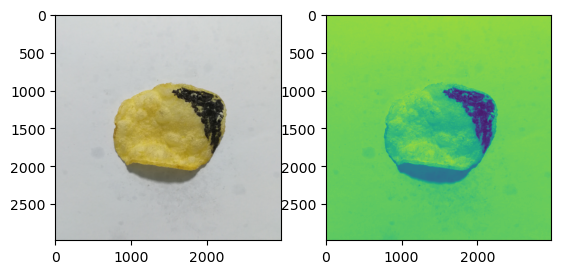

In [506]:
fig = plt.figure(1)
ax1,ax2 = fig.add_subplot(121),fig.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(V_normalized)

In [507]:
# Convert to LAB color space
lab_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2LAB)

# Threshold the L channel to detect darker areas
l_channel = lab_image[:, :, 0]
_, shadow_mask = cv2.threshold(l_channel, 190, 255, cv2.THRESH_BINARY_INV)  # Shadows have low L values


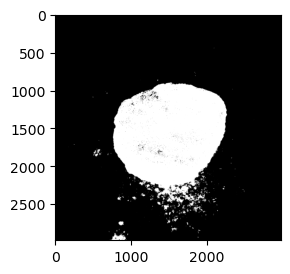

In [508]:
fig = plt.figure(1)
ax1= fig.add_subplot(121)
ax1.imshow(shadow_mask,cmap="gray")
# ax2.imshow(_)

In [509]:
kernel = np.ones((50,50), np.uint8)  # 5x5 kernel for closing
closed = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)

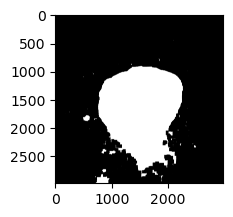

In [510]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(closed,cmap="gray")

In [511]:
np.sum(shadow_mask==255)

1692172

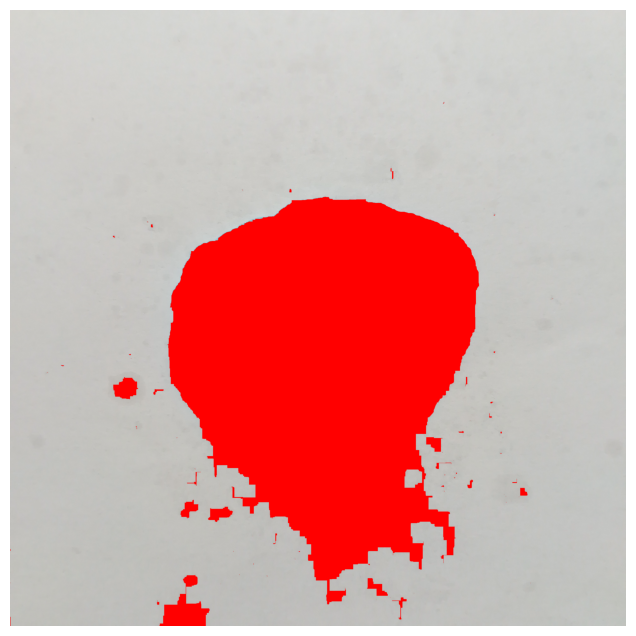

In [512]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert the image from BGR (OpenCV default) to RGB for matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Assume binary_cleaned is the thresholded imag"e after processing (e.g., binary image showing defect areas)
# binary_cleaned = cv2.threshold(...)

# Create a mask from the thresholded image (binary_cleaned)
mask = closed.astype(np.uint8)  # Convert to uint8 for masking

# Create an image that will only highlight the defect areas (green)
highlighted_image = input_image.copy()

# Highlight defect areas in green (we keep the background as it is)
highlighted_image[mask == 255] = (0,0,255)  # Highlight defects in green

# Show the final image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for plotting
plt.axis('off')  # Hide axis
plt.show()


In [513]:
# Convert to LAB color space
lab_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2LAB)

# Threshold the L channel to detect darker areas
l_channel = lab_image[:, :, 0]
_, shadow_mask = cv2.threshold(l_channel, 100, 255, cv2.THRESH_BINARY_INV)  # Shadows have low L values

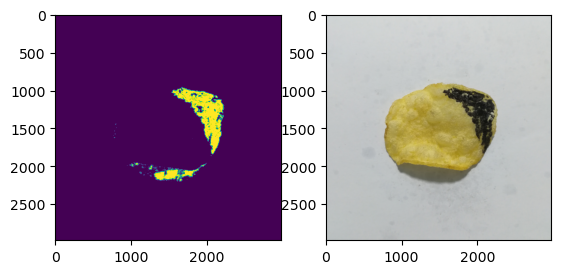

In [514]:
fig = plt.figure(1)
ax1,ax2= fig.add_subplot(121),fig.add_subplot(122)
ax1.imshow(shadow_mask)
ax2.imshow(input_image)

In [515]:
kernel = np.ones((5,5), np.uint8)  # 5x5 kernel for closing
closed = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)

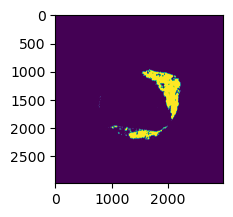

In [516]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(closed)

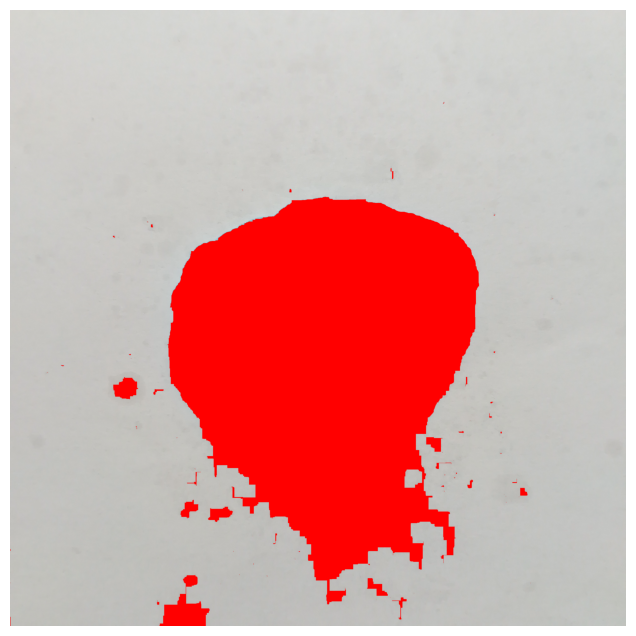

In [517]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert the image from BGR (OpenCV default) to RGB for matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
highlighted_image = input_image.copy()
highlighted_image[mask == 255] = (0,0,255) 

# Show the final image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for plotting
plt.axis('off')  # Hide axis
plt.show()


In [26]:
np.sum(shadow_mask==255)

195334

In [27]:
195343/1011473

0.19312725104871806

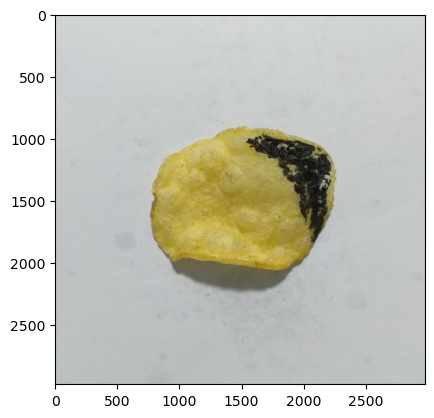

In [652]:
img = io.imread("C:/Users/divya/Desktop/Machine_Learning_Sebestian/Potato_Chip_CNN/Pepsico/Test/Defective/IMG_20210319_004806.jpg")
plt.imshow(img)

In [653]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv,(0,0,0),(180, 255, 65))

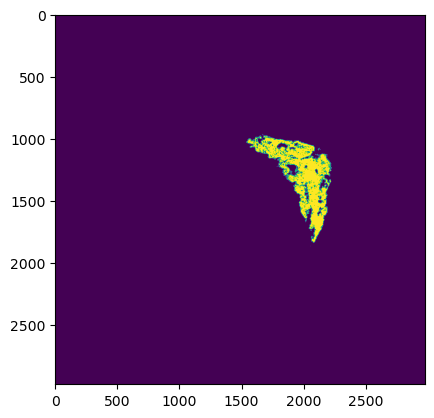

In [654]:
plt.imshow(mask)

In [655]:
closed_mask = nd.binary_closing(mask,np.ones((12,12)))

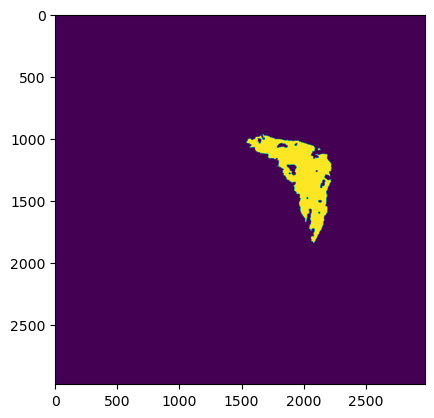

In [658]:
plt.imshow(closed_mask)

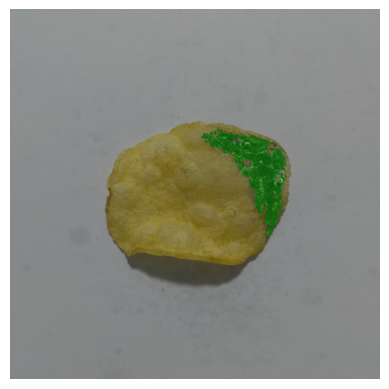

In [659]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Convert binary mask to a 3-channel image (e.g., blue overlay)
mask_colored = np.zeros_like(img)
mask_colored[closed_mask == 1] = [0, 255, 0]  # Green color for segmented areas

# Blend the original image with the mask
overlay = cv2.addWeighted(img, 0.7, mask_colored, 0.3, 0)

# Display result
plt.imshow(overlay)
plt.axis("off")
plt.show()


In [660]:
hsv_chip = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
mask_chip = cv2.inRange(hsv,(20,50,110),(30, 255, 255))

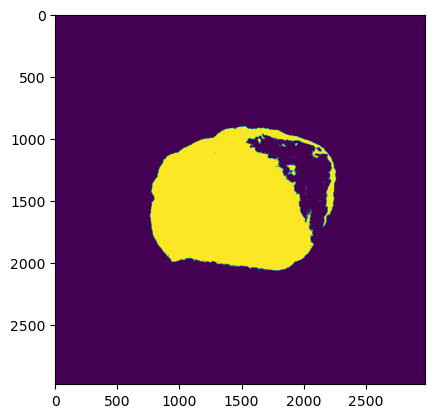

In [662]:
plt.imshow(mask_chip)

In [663]:
closed_mask_chip = nd.binary_closing(mask_chip,np.ones((3,3)))

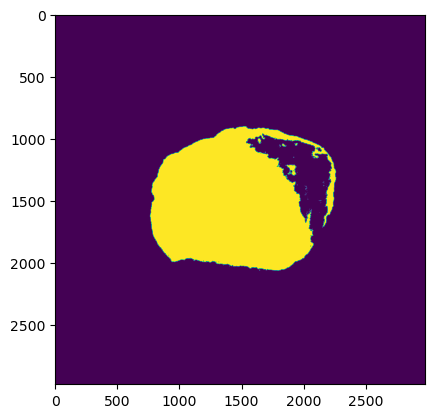

In [664]:
plt.imshow(closed_mask_chip)

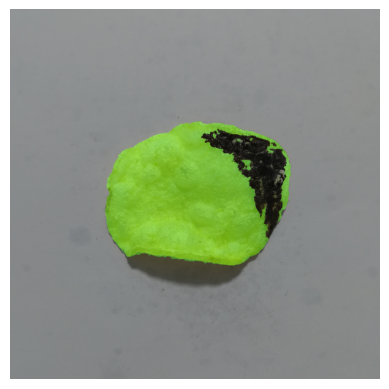

In [669]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Convert binary mask to a 3-channel image (e.g., blue overlay)
mask_colored = np.zeros_like(img)
mask_colored[closed_mask_chip == 1] = [0, 255, 0]  # Green color for segmented areas

# Blend the original image with the mask
overlay = cv2.addWeighted(img, 0.7, mask_colored, 0.3, 0)

# Display result
plt.imshow(overlay)
plt.axis("off")
plt.show()
